In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [16]:
age_data = pd.read_csv('./data/population_by_age.csv')
trend_data = pd.read_csv('./data/population_trend.csv')
region_data = pd.read_csv('./data/population_by_region.csv', encoding='CP949')
area_data = pd.read_csv('./data/region_area.csv',encoding='CP949')

### 1.age 데이터를 활용하여 10대 남자 중 인구수가 많은 순서대로 데이터를 구하는 코드를 작성하세요.

In [45]:
top_10_man_age_10s = age_data[['age','man']][(age_data.age > 9) & (age_data.age < 20)]
top_10_man_age_10s = top_10_man_age_10s.sort_values('man', ascending=False)

top_10_man_age_10s

,age,man
17,17,4580
18,18,4337
19,19,4337
16,16,4105
10,10,3786
15,15,3764
14,14,3755
13,13,3598
11,11,3568
12,12,3433


### 2. age 데이터를 활용하여 20대 여자 중 인구수가 적은 순서대로 5개 데이터를 구하는 코드를 작성하세요.

In [46]:
top_20_woman_age_20s = age_data[['age', 'woman']][(age_data.age > 19) & (age_data.age < 30)]
top_20_woman_age_20s = top_20_woman_age_20s.sort_values('woman')

top_20_woman_age_20s.iloc[0:5, :]


,age,woman
29,29,3123
27,27,3142
28,28,3195
26,26,3793
25,25,3800


### 3. region과 area 데이터를 활용하여 region 대비 총 인구수(인구밀도, 총 인구수 / 지역 면적)를 구하는 코드를 작성하세요.


In [47]:
merge_data = pd.merge(region_data, area_data, how='inner')

merge_data['total'] = merge_data['man'] + merge_data['woman']

merge_data['mildo'] = merge_data['total'] / merge_data['area_km2']

merge_data

,city,region,man,woman,area_km2,total,mildo
0,제주시,한림읍,12990,11399,91.21,24389,267.393926
1,제주시,애월읍,18092,16912,202.20,35004,173.115727
2,제주시,구좌읍,8307,7738,185.94,16045,86.291277
3,제주시,조천읍,12280,11532,150.68,23812,158.030263
4,제주시,한경면,4711,4528,79.12,9239,116.771992
5,제주시,추자면,1362,853,7.16,2215,309.357542
6,제주시,우도면,1007,896,6.18,1903,307.928803
7,제주시,일도1동,1660,1531,0.31,3191,10293.548387
8,제주시,일도2동,17388,18128,2.19,35516,16217.351598
9,제주시,이도1동,4016,4037,0.69,8053,11671.014493


### 4. region 데이터를 활용하여 City 별 남, 녀 인구합산 데이터를 구하는 코드를 작성하세요.

In [48]:
region_data.groupby('city')['man','woman'].sum()


,man,woman
city,,
서귀포시,94927,91444
제주시,247814,244587


### 5. trend 데이터를 활용하여 한국인 남성, 한국인 여성 인구 추이를 표현하는 차트를 그리세요.
* x 축에는 year, y 축에는 population 으로 축 제목을 표시하세요.

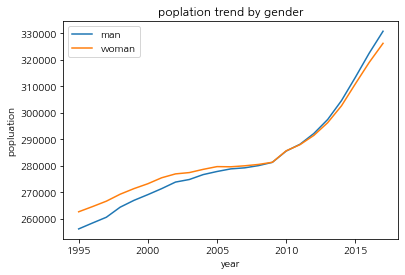

In [54]:
year = trend_data['year']

man = trend_data['korean_man']
woman = trend_data['korean_woman']

plt.plot(year, man, label='man')
plt.plot(year, woman, label='woman')

plt.legend()

plt.xlabel('year')
plt.ylabel('popluation')
plt.title('poplation trend by gender')

plt.show()

### 6. trend 데이터를 활용하여 연도별 총 인구 수 추이를 포현하는 차트를 그리세요.
* x 축에는 year, y 축에는 population 으로 축 제목을 표시하세요.

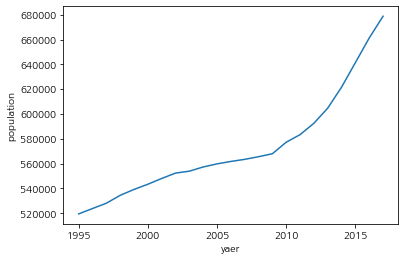

In [55]:
trend_data['total'] = trend_data['korean_man'] + trend_data['korean_woman'] + trend_data['foreign_man'] + trend_data['foreign_woman']

total = trend_data['total']

plt.plot(year, total)

plt.xlabel('yaer')
plt.ylabel('population')


plt.show()

### 7. 인구밀도 데이터 중 밀도가 가장 높은 5개지역을 표시하는 차트를 그리세요.

* 차트에서 한글이 깨질 경우 아래 코드를 먼저 입력하고 실행해보세요.

```
import matplotlib as mpl
plt.rcParams["font.family"] = 'NanumGothic'
```

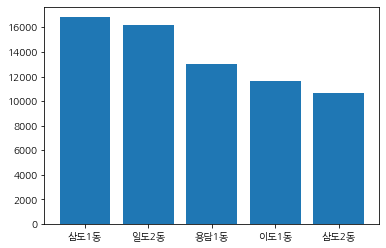

In [56]:
import matplotlib as mpl
plt.rcParams["font.family"] = 'NanumGothic'

merge_data = merge_data.sort_values('mildo', ascending=False)

top_5_mildo = merge_data.iloc[0:5, ]

y = top_5_mildo['mildo']
x = top_5_mildo['region']

plt.bar(x, y)
plt.show()

### 8. region과 area 데이터를 활용하여 총 인구수 와 지역 면적을 비교할 수 있는 차트를 그리세요.


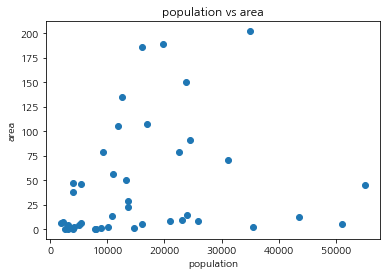

In [57]:
x = merge_data['total']
y = merge_data['area_km2']


plt.scatter(x, y)

plt.xlabel('population')
plt.ylabel('area')
plt.title('population vs area')

plt.show()